# Devoir N° 1 Machine Learning & Text Mining

#### Techniques de régression

## Contexte :
On souhaite établir un modèle de prévision des coûts médicaux en utilisant la régression
linéaire. On dispose d’un dataset contenant les informations suivantes :
- âge : âge du principal bénéficiaire
- sexe : sexe de l'assureur, féminin, masculin
- bmi : indice de masse corporelle,
- enfants : Nombre d'enfants couverts par l'assurance maladie
- Fumeur : oui / non
- région : zone de résidence du bénéficiaire aux États-Unis, nord-est, sud-est, sud-ouest,
nord-ouest.
- charges : Frais médicaux individuels facturés par l'assurance maladie

### Travail à faire :
Développer un modèle de régression linéaire pour prédire les charges à partir des
informations disponibles.

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.calibration import LabelEncoder


### Étape 1: Chargement et Exploration des Données

In [14]:
data = pd.read_csv('data/frais_medicaux.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Étape 2: Visualisation Exploratoire

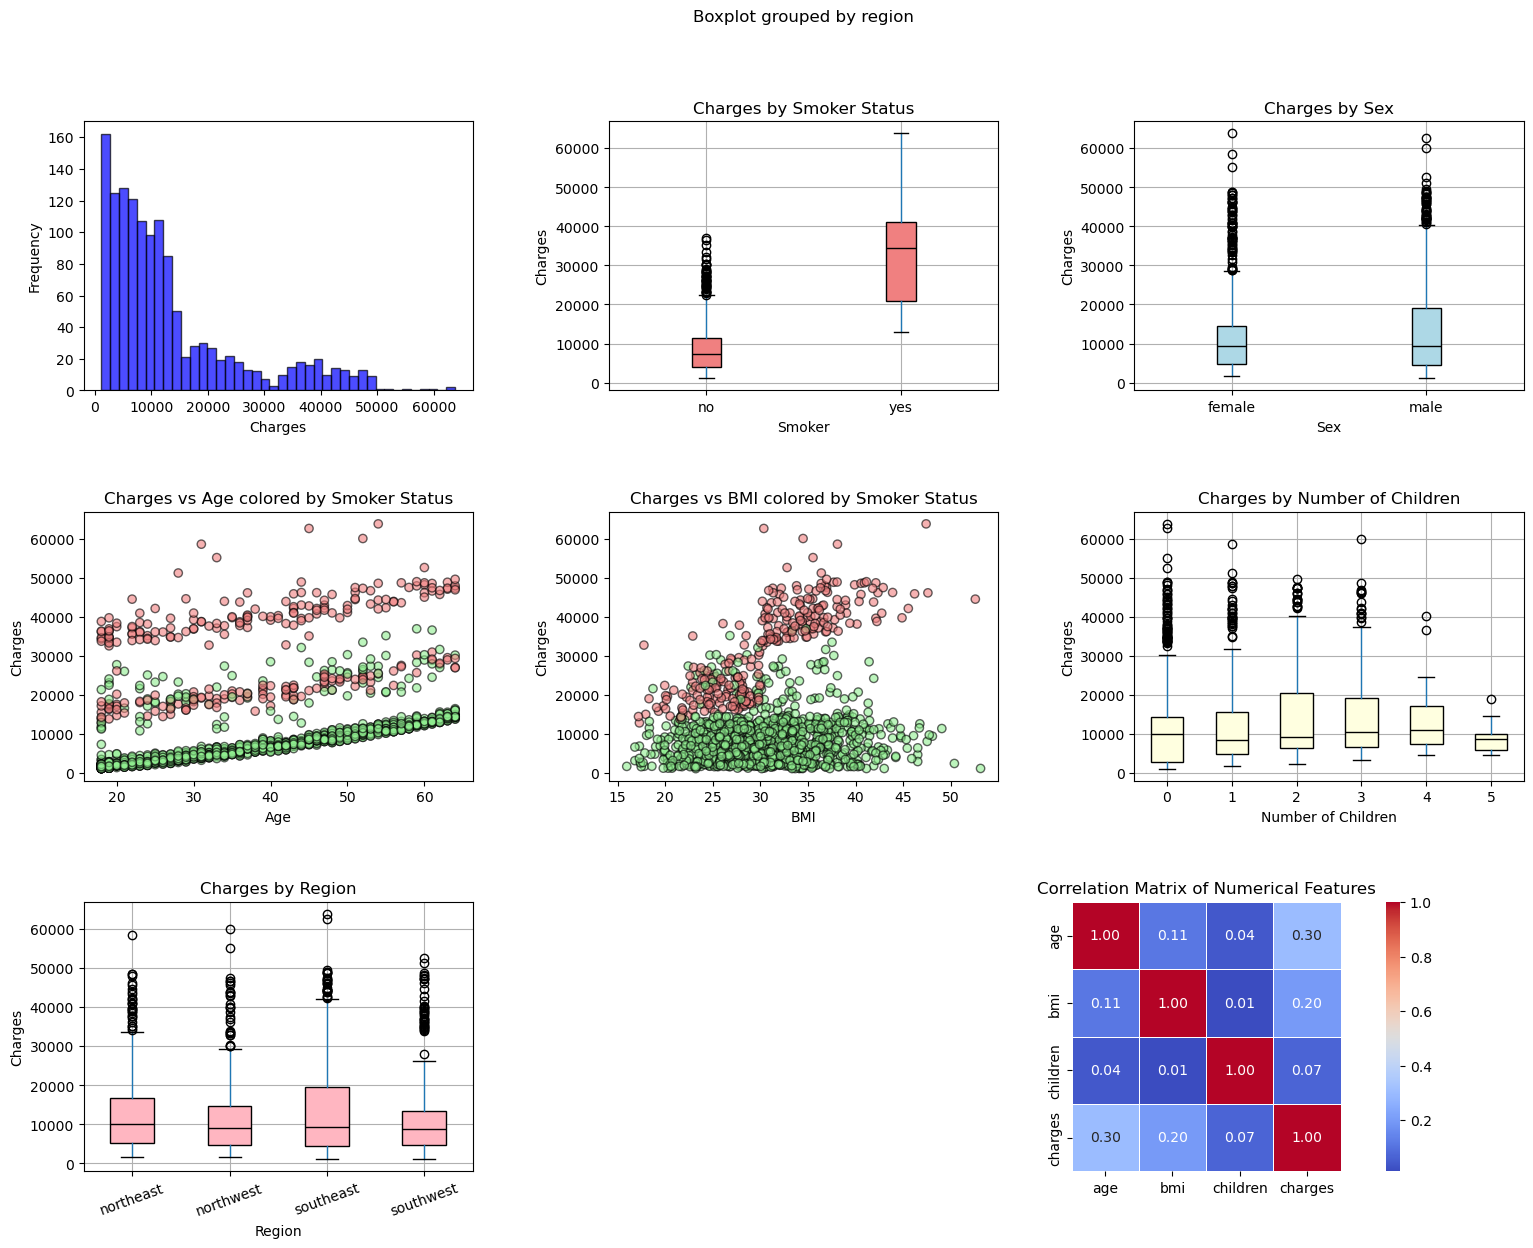

In [15]:
fig = plt.figure(figsize=(18,14))
fig.suptitle('Distribution of the features', fontsize=16)
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.45, wspace=0.35)
# Distribution of the target variable (Charges)
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(data['charges'], bins=40, color='blue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Charges')
ax1.set_ylabel('Frequency')
# Distribution according to the smoker feature
ax2 = fig.add_subplot(gs[0, 1])
data.boxplot(column='charges', by='smoker', ax=ax2, patch_artist=True, boxprops=dict(facecolor='lightcoral'), medianprops=dict(color='black'))
ax2.set_title('Charges by Smoker Status')
ax2.set_xlabel('Smoker')
ax2.set_ylabel('Charges')
plt.sca(ax2)
# Distribution according to sex
ax3 = fig.add_subplot(gs[0, 2])
data.boxplot(column='charges', by='sex', ax=ax3, patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='black'))
ax3.set_title('Charges by Sex')
ax3.set_xlabel('Sex')
ax3.set_ylabel('Charges')
plt.sca(ax3)
# Distribution according to age
ax4 = fig.add_subplot(gs[1, 0])
colors = data['smoker'].map({'no': 'lightgreen', 'yes': 'lightcoral'})
ax4.scatter(data['age'], data['charges'], c=colors, alpha=0.6, edgecolor='black')
ax4.set_xlabel('Age')
ax4.set_ylabel('Charges')
ax4.set_title('Charges vs Age colored by Smoker Status')
# Distribution according to BMI
ax5 = fig.add_subplot(gs[1, 1])
ax5.scatter(data['bmi'], data['charges'], c=colors, alpha=0.6, edgecolor='black')
ax5.set_xlabel('BMI')
ax5.set_ylabel('Charges')
ax5.set_title('Charges vs BMI colored by Smoker Status')
# Distribution according to children
ax6 = fig.add_subplot(gs[1, 2])
data.boxplot(column='charges', by='children', ax=ax6, patch_artist=True, boxprops=dict(facecolor='lightyellow'), medianprops=dict(color='black'))
ax6.set_title('Charges by Number of Children')
ax6.set_xlabel('Number of Children')
ax6.set_ylabel('Charges')
plt.sca(ax6)
# Distribution according to region
ax7 = fig.add_subplot(gs[2, 0])
data.boxplot(column='charges', by='region', ax=ax7, patch_artist=True, boxprops=dict(facecolor='lightpink'), medianprops=dict(color='black'))
ax7.set_title('Charges by Region')
ax7.set_xlabel('Region')
ax7.set_ylabel('Charges')
ax7.tick_params(axis='x', rotation=20)
plt.sca(ax7)
# Correlation Matrix
ax8 = fig.add_subplot(gs[2, 1:])
num_cols = ['age', 'bmi', 'children', 'charges']
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax8, square=True, linewidths=0.5)
ax8.set_title('Correlation Matrix of Numerical Features')
plt.savefig('figs/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


### Étape 3: Préparation des Données - Encodage

In [16]:
data_model = data.copy()
# Variables binaires: Label Encoding
le = LabelEncoder()
data_model['sex_encoded'] = le.fit_transform(data_model['sex'])
data_model['smoker_encoded'] = le.fit_transform(data_model['smoker'])
# Variables régionales: One-Hot Encoding
region_dummies = pd.get_dummies(data_model['region'], prefix='region', drop_first=True)
data_model = pd.concat([data_model, region_dummies], axis=1)
print(data_model.columns.tolist())
# Selection des features finales
features = ['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded'] + region_dummies.columns.tolist()
X = data_model[features]
y = data_model['charges']
print("\n")
print(X.head())


['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sex_encoded', 'smoker_encoded', 'region_northwest', 'region_southeast', 'region_southwest']


   age  sex_encoded  ...  region_southeast  region_southwest
0   19            0  ...             False              True
1   18            1  ...              True             False
2   28            1  ...              True             False
3   33            1  ...             False             False
4   32            1  ...             False             False

[5 rows x 8 columns]


### Étape 4: Division Train / Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 1070 samples
Test set size: 268 samples


### Étape 5: Entrainement du Modèle

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
coef_data = pd.DataFrame({
    'Variable': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)
print(coef_data.to_string(index=False))

        Variable  Coefficient
  smoker_encoded 23651.128856
        children   425.278784
             bmi   337.092552
             age   256.975706
     sex_encoded   -18.591692
region_northwest  -370.677326
region_southeast  -657.864297
region_southwest  -809.799354


### Étape 6: Évaluation du Modèle

In [19]:
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

r2_train  = r2_score(y_train, y_pred_train)
r2_test   = r2_score(y_test, y_pred_test)
mae_test  = mean_absolute_error(y_test, y_pred_test)
mse_test  = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"\n  R² (train)  : {r2_train:.4f}  → {r2_train*100:.2f}% de variance expliquée sur l'entraînement")
print(f"  R² (test)   : {r2_test:.4f}  → {r2_test*100:.2f}% de variance expliquée sur le test")
print(f"  MAE (test)  : {mae_test:,.2f} $ (erreur absolue moyenne)")
print(f"  RMSE (test) : {rmse_test:,.2f} $ (racine de l'erreur quadratique)")


  R² (train)  : 0.7417  → 74.17% de variance expliquée sur l'entraînement
  R² (test)   : 0.7836  → 78.36% de variance expliquée sur le test
  MAE (test)  : 4,181.19 $ (erreur absolue moyenne)
  RMSE (test) : 5,796.28 $ (racine de l'erreur quadratique)


### Étape 7: Visualisations des Résultats

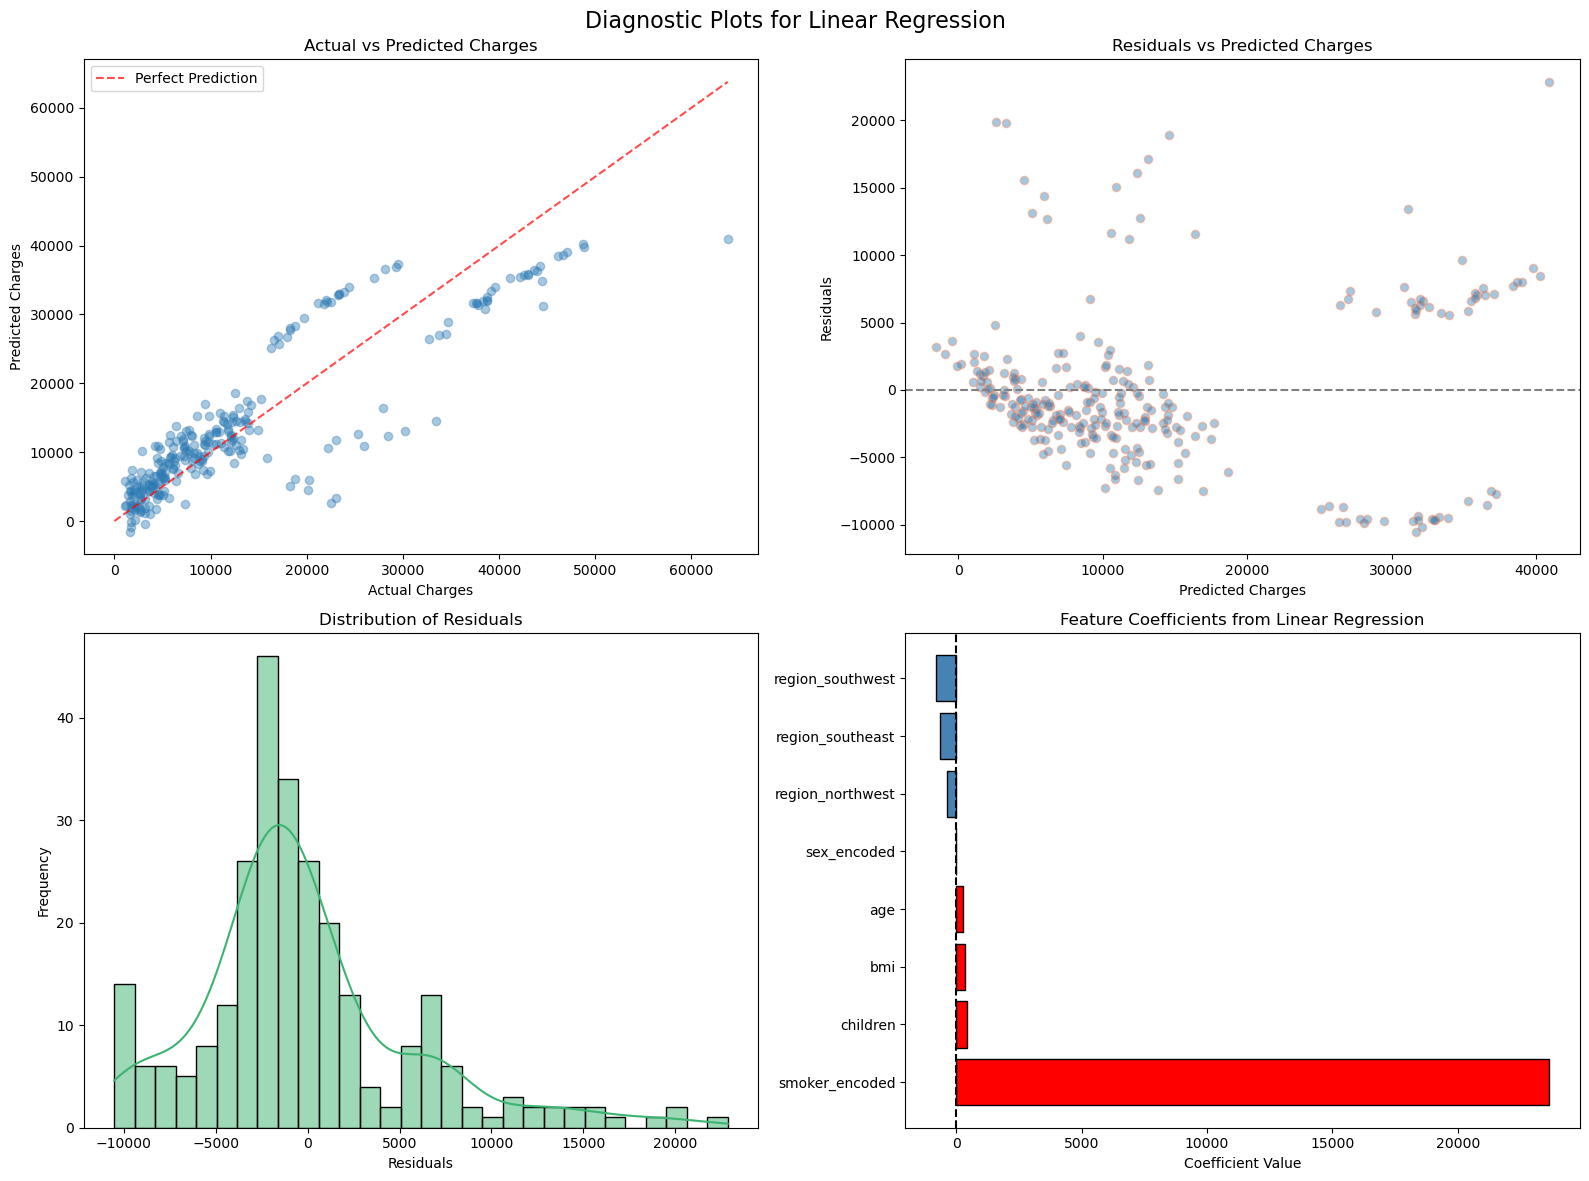

In [20]:
fig2, axes = plt.subplots(2, 2, figsize=(16, 12))
fig2.suptitle('Diagnostic Plots for Linear Regression', fontsize=16)
# Valuers prédites vs réelles
ax = axes[0, 0]
ax.scatter(y_test, y_pred_test, alpha=0.4, edgecolor='steelblue')
lims = [0, max(max(y_test), max(y_pred_test))]
ax.plot(lims, lims, 'r--', alpha=0.7, label='Perfect Prediction')
ax.set_xlabel('Actual Charges')
ax.set_ylabel('Predicted Charges')
ax.set_title('Actual vs Predicted Charges')
ax.legend()
# Résidus
residuals = y_test - y_pred_test
ax = axes[0, 1]
ax.scatter(y_pred_test, residuals, alpha=0.4, edgecolor='coral')
ax.axhline(0, color='gray', linestyle='--', lw=1.5)
ax.set_xlabel('Predicted Charges')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Predicted Charges')
# Distribution des résidus
ax = axes[1, 0]
sns.histplot(residuals, bins=30, kde=True, color='mediumseagreen', edgecolor='black', ax=ax)
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Residuals')
# Importance des coefficients
ax = axes[1, 1]
colors_bar = ['red' if c > 0 else 'steelblue' for c in coef_data['Coefficient']]
bars = ax.barh(coef_data['Variable'], coef_data['Coefficient'], color=colors_bar, edgecolor='black')
ax.axvline(0, color='black', linestyle='--', lw=1.5)
ax.set_xlabel('Coefficient Value')
ax.set_title('Feature Coefficients from Linear Regression')
plt.tight_layout()
plt.savefig('figs/model_diagnostics.png', dpi=300, bbox_inches='tight')
plt.show()


### Étape 8: Exemple de Prédiction

In [21]:
new_patient = pd.DataFrame({
    'age': [40],
    'sex_encoded': [1],        
    'bmi': [28.0],
    'children': [2],
    'smoker_encoded': [0],     
    'region_northwest': [1],
    'region_southeast': [0],
    'region_southwest': [0]
})
predicted_charge = model.predict(new_patient)[0]
print(f"\n Profil: Homme de 40 ans, BMI de 28, 2 enfants, non-fumeur, vivant dans le nord-ouest.")
print(f"Predicted medical charge for the new patient: {predicted_charge:.2f} $")

new_patient2 = pd.DataFrame({
    'age': [50],
    'sex_encoded': [0],       
    'bmi': [33.0],
    'children': [0],
    'smoker_encoded': [1],     
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0]
})
pred2 = model.predict(new_patient2)[0]
print(f"\n  Profil : Femme, 50 ans, BMI=33, 0 enfants, fumeuse, southeast")
print(f"  → Charges prédites : {pred2:,.2f} $")


 Profil: Homme de 40 ans, BMI de 28, 2 enfants, non-fumeur, vivant dans le nord-ouest.
Predicted medical charge for the new patient: 8247.69 $

  Profil : Femme, 50 ans, BMI=33, 0 enfants, fumeuse, southeast
  → Charges prédites : 35,034.89 $
